### Understanding CNN Model Structure(Pytorch Tutorial)

In [10]:
import torch
import torch.nn as nn 
#  Convolution layer, Pooling layer, activation function, dropout function 등 다양한 기능 제공
import torch.nn.functional as F 
# torch.nn.functional을 F로 바꿈으로써 매번 torch.nn.funtional을 칠 필요 없이 F 하나만 치면 됨.

#CNN 모델 정의 for image classification

class CNN(nn.Module): #CNN class 
    def __init__(self): # CNN class 초기화
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3) #input channel, output_channel, kernel size, stride = 1 (auto) 3x3x3 filter가 6개
        self.pool = nn.MaxPool2d(2) # kernel size
        self.conv2 = nn.Conv2d(6, 16, 3) 
        self.fc1 = nn.Linear(16 * 6 * 6 , 120) # input: 576, output:120(최종 conv 이후 size 고려)
        self.fc2 = nn.Linear(120, 84) # input:120 unit, output: 84 unit
        self.fc3 = nn.Linear(84, 10) # input: 84 unit, output: number of classes

    def forward(self, x): #Feedforward 정의, print는 예시용
        print(x.size()) 
        x = self.pool(F.relu(self.conv1(x))) # x에 conv1, Relu함수 적용 후 Maxpooling
        print("After Conv1 layer:", x.size())
        x = self.pool(F.relu(self.conv2(x))) # x에 conv2, Relu함수 적용 후 Maxpooling
        print("After Conv2 layer:",x.size())
        x = torch.flatten(x, 1) # FCL을 위해 flatten 형태로 만들기
        print("After Flatten:", x.size())
        x = F.relu(self.fc1(x)) # fc1에 Relu
        print(x.size())
        x = F.relu(self.fc2(x)) # fc2에 Relu
        print(x.size())
        x = self.fc3(x) # fc3 적용(최종)
        print(x.size())
        return x

#model 지정
model = CNN()

#Example 
output = model(torch.randn(20, 3, 30, 30)) 
#input size: 30x30, 3 channel, batch size = 20, randn으로 임의 값 tensor 생성
# Conv1: 30*30에서 kernel이 3, out_channel이 6이므로 6*28*28
# Pool: 28*28에서 2배씩 감소하고 stride = 2이므로 겹치는 구간 없이 14*14로 축소
# Conv2: 14*14에서 kernel이 3이므로 12*12로 축소
# Pool: 12*12에서 반 줄어든 6*6로 축소
# Flatten: filter * size * size로 압축 
# FCL을 거치고 나면 10개의 숫자로 구성(output unit이 10개) 
# final output은 20*10의 형태

torch.Size([20, 3, 30, 30])
After Conv1 layer: torch.Size([20, 6, 14, 14])
After Conv2 layer: torch.Size([20, 16, 6, 6])
After Flatten: torch.Size([20, 576])
torch.Size([20, 120])
torch.Size([20, 84])
torch.Size([20, 10])


### CNN Model Training with CIFAR10 - Dataset Load & Setting

In [105]:
import torch
from torchvision import datasets as D
from torchvision import transforms as T

transform =T.Compose(
    [
    T.ToTensor(), #이미지 tensor로 변환, 계산 가능 형태
     T.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))]) #3개의 channel에 대해 mean, std로 정규화

batch_size = 20 # 이미지 묶음 당 이미지 개수

#CIFAR10 - 10개 클래스, 32x32x3 이미지
#train data 정의
trainset = D.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform) 

# trainloader를 통해 train_data를 load
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True)

#test data 정의
testset = D.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

# testloader를 통해 test_data를 load
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False)

image, label = trainset[0]
print(f"Image size with channel: {image.size()}")
print("total data in train dataset: ", len(trainloader.dataset)) # train_data의 개수
print("total data in test dataset: ",len(testloader.dataset)) # test_data의 개수

Files already downloaded and verified
Files already downloaded and verified
Image size with channel: torch.Size([3, 32, 32])
total data in train dataset:  50000
total data in test dataset:  10000


### Prepare CNN Model 

In [106]:
import torch
import torch.nn as nn 
import torch.nn.functional as F 

class CNN(nn.Module): 
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) 
        self.pool = nn.MaxPool2d(2,2) 
        self.conv2 = nn.Conv2d(6, 16, 5) 
        self.fc1 = nn.Linear(16 * 5 * 5 , 120) 
        self.fc2 = nn.Linear(120, 84) 
        self.fc3 = nn.Linear(84, 10) 

    def forward(self, x): # input image: 3*32*32
        x = self.pool(F.relu(self.conv1(x))) # image: 3*32*32 -> 6*28*28 -> 6*14*14
        x = self.pool(F.relu(self.conv2(x))) # image: 6*14*14-> 16*10*10 -> 16*5*5
        x = torch.flatten(x, 1) # layer unit: 16*5*5
        x = F.relu(self.fc1(x)) # layer unit: 16*5*5 -> 120
        x = F.relu(self.fc2(x)) # layer unit: 120 -> 84
        x = self.fc3(x) # output unit: 10
        return x

cnn_model = CNN()
print("Model Prepared")

Model Prepared


### Loss Function & Optimizer

In [107]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss() #loss function 설정
optimizer = optim.SGD(cnn_model.parameters(), lr=0.001, momentum=0.9) #Optimizer: SGD, cnn_model의 파라미터 설정, learning rate, momentum 값 설정(일반적으로 0.9)
print("Loss Function, Optimizer prepared")

Loss Function, Optimizer prepared


### Training 과정

In [108]:
num_epoch = 10
total_step = len(trainloader)
epoch_losses = []

for epoch in range(num_epoch): #epoch: 학습에서 batch를 다 돈 횟수
    for i, data in enumerate(trainloader):

        inputs, labels = data

        # zero the parameter gradients - 기울기 누적 방지
        optimizer.zero_grad()

        # forward
        outputs = cnn_model(inputs)
        loss = criterion(outputs, labels)

        #backward & Opt
        loss.backward()
        optimizer.step() # 파라미터 업데이트
        
        # print statistics
        if (i+1) % 100 == 0: 
            epoch_losses.append(loss.item())
            print(f'Epoch [{epoch+1}/{num_epoch}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}') #epoch마다 뽑을 것

print('Finished Training')


Epoch [1/10], Step [100/2500], Loss: 2.2978
Epoch [1/10], Step [200/2500], Loss: 2.2867
Epoch [1/10], Step [300/2500], Loss: 2.3105
Epoch [1/10], Step [400/2500], Loss: 2.2645
Epoch [1/10], Step [500/2500], Loss: 2.1748
Epoch [1/10], Step [600/2500], Loss: 2.1889
Epoch [1/10], Step [700/2500], Loss: 2.2310
Epoch [1/10], Step [800/2500], Loss: 1.9920
Epoch [1/10], Step [900/2500], Loss: 2.1083
Epoch [1/10], Step [1000/2500], Loss: 1.6435
Epoch [1/10], Step [1100/2500], Loss: 1.4047
Epoch [1/10], Step [1200/2500], Loss: 1.8594
Epoch [1/10], Step [1300/2500], Loss: 1.8556
Epoch [1/10], Step [1400/2500], Loss: 1.6079
Epoch [1/10], Step [1500/2500], Loss: 1.7589
Epoch [1/10], Step [1600/2500], Loss: 1.7621
Epoch [1/10], Step [1700/2500], Loss: 1.5551
Epoch [1/10], Step [1800/2500], Loss: 1.7874
Epoch [1/10], Step [1900/2500], Loss: 1.5221
Epoch [1/10], Step [2000/2500], Loss: 1.7299
Epoch [1/10], Step [2100/2500], Loss: 1.7723
Epoch [1/10], Step [2200/2500], Loss: 1.7707
Epoch [1/10], Step 

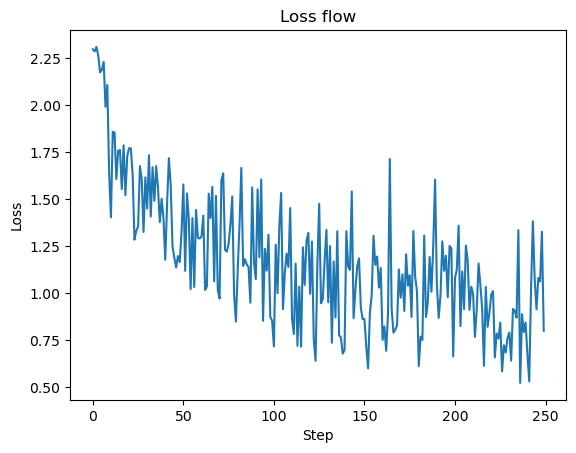

In [109]:
import matplotlib.pyplot as plt
# 이 코드는 batch size에 따라 찍히는 점의 수가 달라지기 때문에 코드 보완 필요.
plt.plot(epoch_losses)
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Loss flow')
plt.show()

### CNN model Inference

In [110]:
with torch.no_grad():
    correct = 0
    total = 0
    
    for datas in testloader:
        images, labels = data
        outputs = cnn_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct // total} %')

Accuracy of the network on the test images: 64 %
